In [21]:
%load_ext autoreload
%autoreload 2
import duckdb
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Initialize DuckDB connection
conn = duckdb.connect("splink")

In [26]:
result = conn.execute("""
             SELECT
                 SUM(CASE WHEN kingdom IS NULL THEN 1 ELSE 0 END) as kingdom_nulo,
                 SUM(CASE WHEN phylum IS NULL THEN 1 ELSE 0 END) as phylum_nulo,
                 SUM(CASE WHEN class IS NULL THEN 1 ELSE 0 END) as class_nulo,
                 SUM(CASE WHEN "order" IS NULL THEN 1 ELSE 0 END) as order_nulo,
                 SUM(CASE WHEN family IS NULL THEN 1 ELSE 0 END) as family_nulo,
                 SUM(CASE WHEN genus IS NULL THEN 1 ELSE 0 END) as genus_nulo,
                 SUM(CASE WHEN specificepithet IS NULL THEN 1 ELSE 0 END) as species_nulo,
                 COUNT(*) as total_registros
             FROM specieslink
""").df()
result

,kingdom_nulo,phylum_nulo,class_nulo,order_nulo,family_nulo,genus_nulo,species_nulo,total_registros
0,0.0,63972.0,74437.0,75616.0,6650.0,10545.0,30206.0,104000


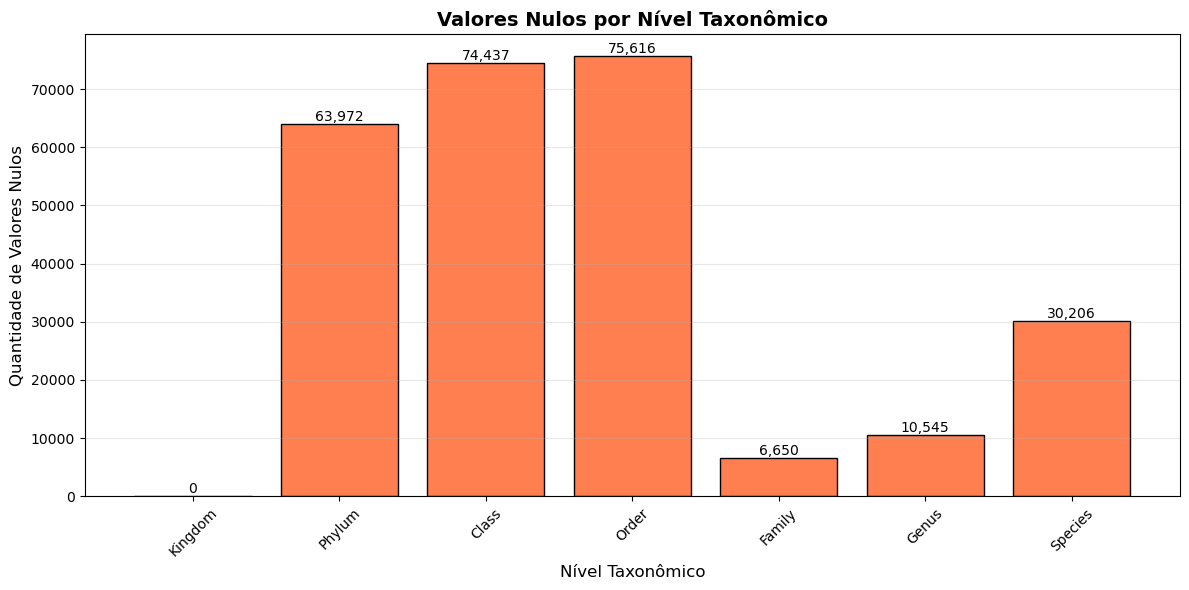

In [27]:
# Transformar o resultado em formato vertical
niveis = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
valores = [
    result['kingdom_nulo'].iloc[0],
    result['phylum_nulo'].iloc[0],
    result['class_nulo'].iloc[0],
    result['order_nulo'].iloc[0],
    result['family_nulo'].iloc[0],
    result['genus_nulo'].iloc[0],
    result['species_nulo'].iloc[0]
]

# Criar DataFrame para facilitar a visualização
df_plot = pd.DataFrame({
    'Nível Taxonômico': niveis,
    'Quantidade de Nulos': valores
})

plt.figure(figsize=(12, 6))
bars = plt.bar(df_plot['Nível Taxonômico'], df_plot['Quantidade de Nulos'], color='coral', edgecolor='black')

# Adicionar valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Nível Taxonômico', fontsize=12)
plt.ylabel('Quantidade de Valores Nulos', fontsize=12)
plt.title('Valores Nulos por Nível Taxonômico', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()